In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

0.23.1


1.导入数据, 数据清理, 预处理(import, clean, pre=procession)

In [2]:
redWine = pd.read_csv("winequality-red.csv", delimiter=";") 
redWine.columns = redWine.columns.str.replace(" ","_")
redWine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
whiteWine = pd.read_csv("winequality-white.csv", delimiter=";")
whiteWine.columns = whiteWine.columns.str.replace(" ","_")
whiteWine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
redWine.info()
redWine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:

whiteWine.info()
whiteWine.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

2. 基本特征(质量分布, ), 粗略的属性-质量相关性(皮尔森相关系数),  

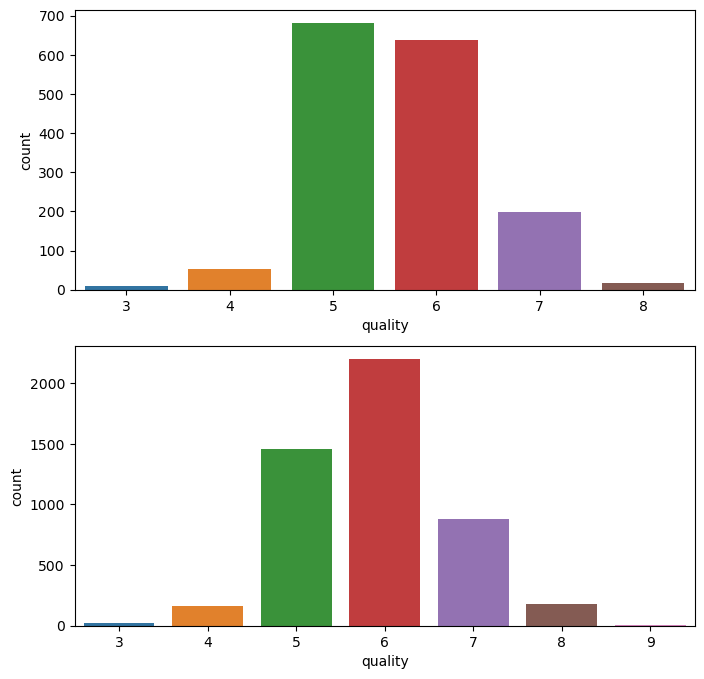

In [6]:
figQ, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))

sns.countplot(redWine['quality'], ax = ax1)
sns.countplot(whiteWine['quality'], ax = ax2)
plt.show()

Q1. Which variable(s) is (are) the most influential one(s) to the quality of the red/white wine?
Q3. Are the influential variables of the red wine the same as those of the white wine?

0.47616632400114156


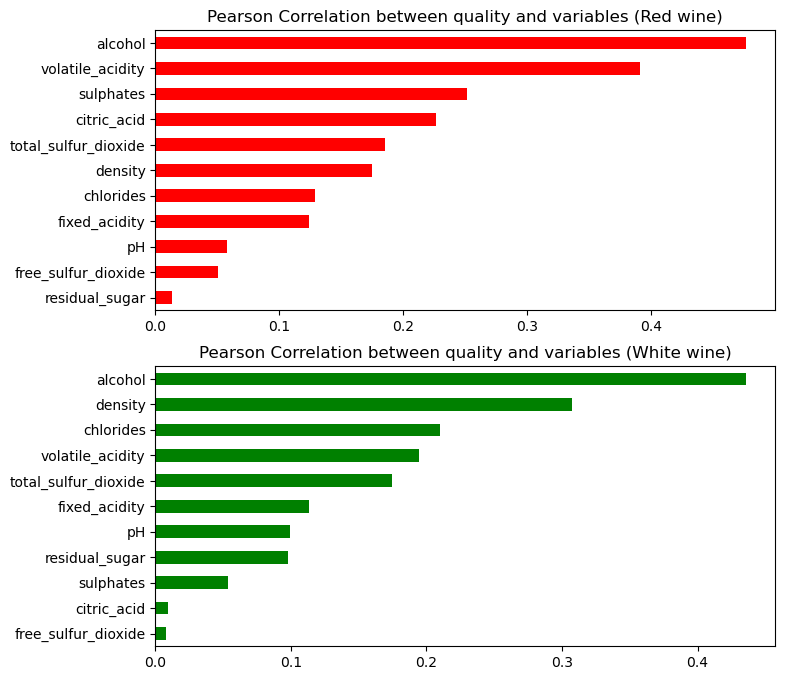

In [26]:
figQCorr, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))
redQcorr = abs(redWine.corr(method='pearson')[
               'quality']).sort_values(ascending=True)[:-1]
whiteQcorr = abs(whiteWine.corr(method ='pearson')['quality']).sort_values(ascending=True)[:-1]
print(redQcorr['alcohol'])
redQcorr.plot(kind='barh', ax=ax1, title='Pearson Correlation between quality and variables (Red wine)', color='red')
whiteQcorr.plot(kind = 'barh', ax=ax2, title='Pearson Correlation between quality and variables (White wine)', color='green')
#TODO: Export the Quality Corrilation->Slope plot


Q2. Are there any correlations between different variables?

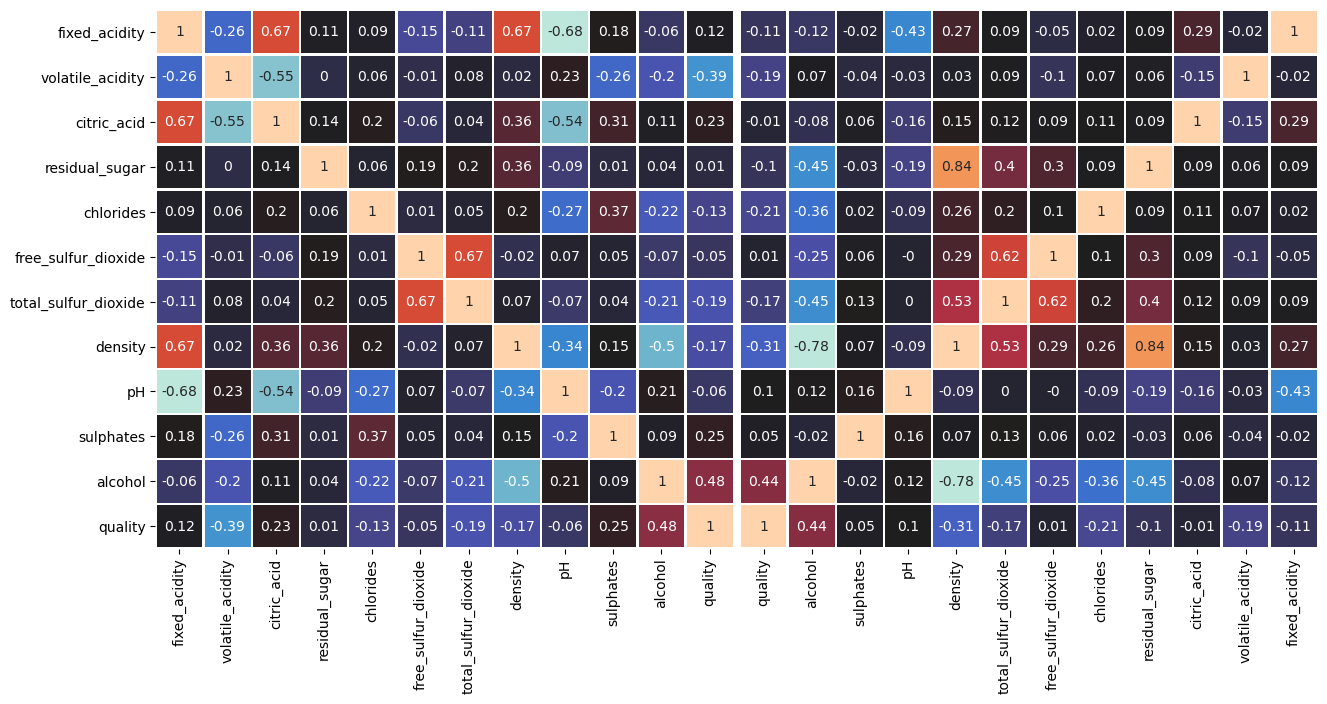

In [80]:
#Correlation 2
redCorr = redWine.corr(method ='pearson')
whiteCorr = whiteWine.corr(method='pearson')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.subplots_adjust(wspace=0.01)

sns.heatmap(redCorr.round(2), cmap="icefire", linewidths=1, ax=ax1, cbar=False, annot=True)
sns.heatmap(whiteCorr.round(2), cmap="icefire", linewidths=1, ax=ax2, cbar=False, annot=True)
ax2.set_yticks([])
ax2.invert_xaxis()
plt.show()



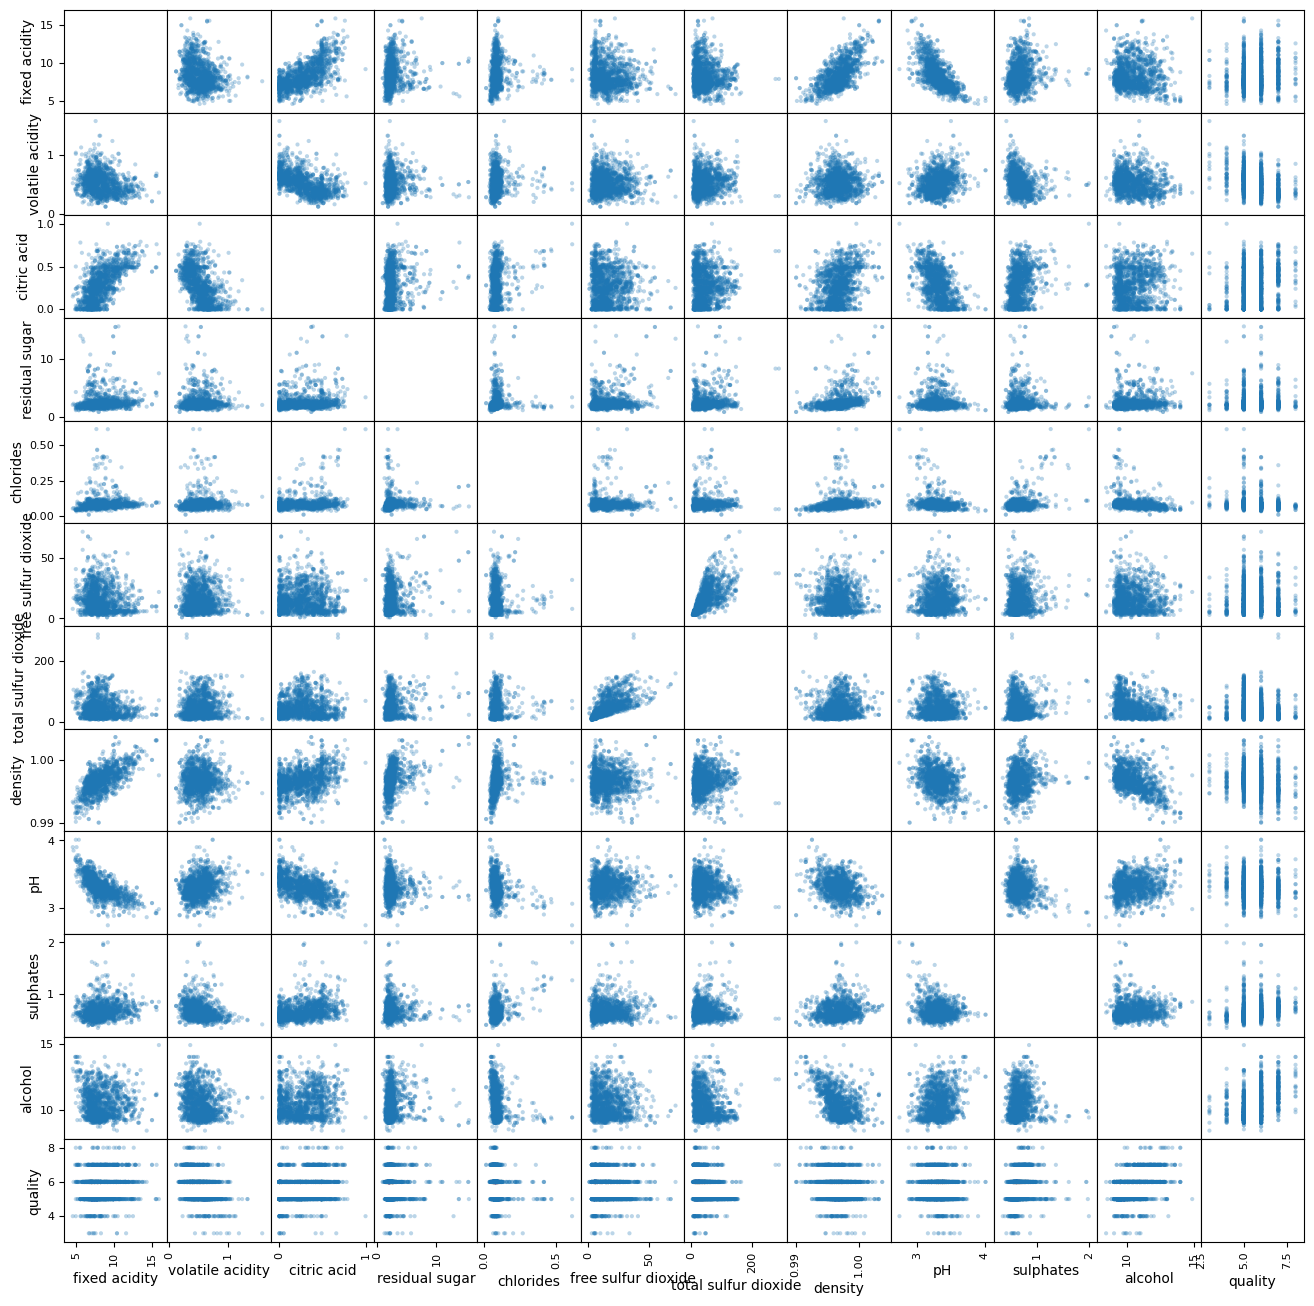

In [41]:
fig2 = pd.plotting.scatter_matrix(redWine, figsize=(16, 16), diagonal='', alpha = 0.3, range_padding=0.2)


Q1. 对质量影响最大的属性: 分别列出红/白葡萄酒的影响属性, 给出置信度
Q2. 属性间关联: A. 化学上, 酸-pH直接联系, B. Heatmap结果显示
Q3. 

In [ ]:
A4-1 决策树预测

In [30]:
redWine.columns


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [89]:
xRed = redWine.iloc[:, [1,2,6,9,10]]
qualityLevel = []
for q in redWine['quality']:
    if q<=4:
        qualityLevel.append(0)
    elif q<=6:
        qualityLevel.append(1)
    elif q<=10:
        qualityLevel.append(2)
redWine['qualityLevel']=qualityLevel
yRed = redWine['qualityLevel']


In [90]:
from collections import Counter
Counter(yRed)


Counter({1: 1319, 2: 217, 0: 63})

In [91]:
import sklearn

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xRed = sc.fit_transform(xRed)

In [93]:
from sklearn.model_selection import train_test_split
xRedTrain, xRedTest, yRedTrain, yRedTest = train_test_split(xRed, yRed, test_size = 0.3)


In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

dtRed = DecisionTreeClassifier()
dtRed.fit(xRedTrain, yRedTrain)
dtRedPredict = dtRed.predict(xRedTest)

dtRedConfMatrix = confusion_matrix(yRedTest, dtRedPredict)
dtRedAccScore = accuracy_score(yRedTest, dtRedPredict)
print(dtRedConfMatrix)
print(dtRedAccScore)

[[  3  14   2]
 [ 12 355  33]
 [  1  28  32]]
0.8125


A2-Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

lrRed = LogisticRegression()
lrRed.fit(xRedTrain, yRedTrain)
lrRedPredict = lrRed.predict(xRedTest)

lrRedConfMatrix = confusion_matrix(yRedTest, lrRedPredict)
lrRedAccScore = accuracy_score(yRedTest, lrRedPredict)
print(lrRedConfMatrix)
print(lrRedAccScore)


[[  0  19   0]
 [  2 382  16]
 [  0  46  15]]
0.8270833333333333
